In [ ]:
import polymv

In [2]:
help(polymv)

Help on package polymv:

NAME
    polymv

PACKAGE CONTENTS
    polymv
    utils

FILE
    /home/renan/polyMV-project/polyMV/polymv/__init__.py




In [1]:
from polymv import polymv
from polymv import utils

In [2]:
help(polymv)

Help on module polymv.polymv in polymv:

NAME
    polymv.polymv

FUNCTIONS
    fvs(input1, input2, LMAX)
        Get Fréchet mean vectors in spherical coordinates for a multipole given a map based on lmax.

        Parameters:
            input1 (float): Multipole vector theta coordinate.
            input2 (float): Multipole vector phi coordinate.
            LMAX (int): Maximum l value to compute the Fréchet mean.

        Returns:
            array: An array for all Fréchet mean based on all multipole vectors in spherical coordinates (theta, phi) from l=2 to lmax.

    mvs(input1, input2, LMAX)
        Get multipole vectors in spherical coordinates for a multipole given a map based on lmax.

        Parameters:
            input1 (float): Real part of multipole moments from a map (Healpy indexing).
            input2 (float): Imaginary part of multipole moments from a map (Healpy indexing).
            LMAX (int): Maximum l value to compute the multipole vectors.

        Returns:
 

In [3]:
help(utils)

Help on module polymv.utils in polymv:

NAME
    polymv.utils

FUNCTIONS
    get_mvs_from_many(mvs, lin, lout, l)
        Get specific multiple vectors given a list of many (output from mvs).

        Args:
            mvs (np.ndarray): array containing multipole vectors [theta, phi].
            lin (int): initial multipole.
            lout (int): final multipole.
            l (int): multipole.

        Returns:
            np.ndarray.

    mvs_north(mvs)
        Get multipole vectors on north hemisphere.

        Args:
            mvs (np.ndarray): array containing multipole vectors [theta, phi].

        Returns:
            np.ndarray [theta, phi] in radians.

    to_cart(theta_phi_array)
        Convert spherical to Cartesian coordinate. This function works only for a single multipole or stacked arrays, e.g. 2 and 3 MVs together.

        Args:
            theta_phi_array (np.ndarray): array containing in radians [theta, phi].

        Returns:
            np.ndarray.

DATA
    

In [4]:
from polymv import utils

In [5]:
help(utils.get_mvs_from_many)

Help on cython_function_or_method in module polymv.utils:

get_mvs_from_many(mvs, lin, lout, l)
    Get specific multiple vectors given a list of many (output from mvs).

    Args:
        mvs (np.ndarray): array containing multipole vectors [theta, phi].
        lin (int): initial multipole.
        lout (int): final multipole.
        l (int): multipole.

    Returns:
        np.ndarray.



In [6]:
import numpy as np
import healpy as hp

In [7]:
np.random.seed(1)
alm = hp.synalm(np.ones(2000), lmax=10)
alm

array([ 1.62434536+0.j        , -0.61175641+0.j        ,
       -0.52817175+0.j        , -1.07296862+0.j        ,
        0.86540763+0.j        , -2.3015387 +0.j        ,
        1.74481176+0.j        , -0.7612069 +0.j        ,
        0.3190391 +0.j        , -0.24937038+0.j        ,
        1.46210794+0.j        , -1.45673947+0.58546648j,
       -0.22798339+0.16270155j, -0.27156744+0.53882327j,
        0.80169606-0.15720974j, -0.77774057-0.14195739j,
       -0.12192515+0.13191882j, -0.62073964+0.2899503j ,
        0.02984963+0.14021908j,  0.41211259+0.08415182j,
       -0.77825528-0.47422985j,  0.8094419 +0.26697791j,
        0.63752091+0.08614065j,  0.35531715+0.79866573j,
        0.63700135+0.84776296j, -0.48346861+0.13092536j,
       -0.08689651-0.26536653j, -0.66168891-0.4516506j ,
       -0.18942548+0.29945573j,  0.37501795+0.05468769j,
       -0.48907801-0.24314127j, -0.28054711+0.03082763j,
       -0.48590448-0.4384068j , -0.59765064+0.49358318j,
       -0.47464269-0.31616764j,

In [8]:
alm = np.column_stack([alm.real, alm.imag])

In [9]:
mvs = polymv.mvs(alm[:, 0], alm[:, 1], 10)

In [10]:
mvs

(array([1.71404848, 1.95321205, 1.42754418, 1.18838061, 2.52617232,
        1.95133657, 2.32335067, 0.61542034, 1.19025609, 0.81824198,
        2.01551566, 2.17407353, 1.67148957, 2.36593261, 0.96751912,
        1.12607699, 1.47010308, 0.77566004, 2.37337633, 2.55538241,
        1.7749402 , 2.26796172, 2.56960833, 0.58621024, 0.57198432,
        1.36665246, 0.87363093, 0.76821633, 0.53972316, 1.3594887 ,
        2.0842408 , 2.10954688, 2.09655225, 2.20423086, 2.60186949,
        1.78210395, 1.05735185, 1.03204577, 1.04504041, 0.9373618 ,
        2.82357986, 1.9008584 , 2.35633825, 1.54468427, 1.86030571,
        1.59690838, 1.74859864, 1.28128694, 1.39299401, 1.24073425,
        1.06169396, 2.07989869, 0.7852544 , 0.3180128 , 2.22770644,
        2.09911927, 1.31190929, 2.74672287, 2.25931768, 1.82968336,
        1.72305961, 1.41853304, 1.47702552, 2.01221429, 1.66456713,
        1.12937836, 1.04247338, 0.88227497, 0.91388621, 0.39486978,
        2.74250358, 2.75581749, 2.10984422, 2.54

In [11]:
mvs2 = np.vstack(mvs)

In [12]:
help(polymv.fvs)

Help on cython_function_or_method in module polymv.polymv:

fvs(input1, input2, LMAX)
    Get Fréchet mean vectors in spherical coordinates for a multipole given a map based on lmax.

    Parameters:
        input1 (float): Multipole vector theta coordinate.
        input2 (float): Multipole vector phi coordinate.
        LMAX (int): Maximum l value to compute the Fréchet mean.

    Returns:
        array: An array for all Fréchet mean based on all multipole vectors in spherical coordinates (theta, phi) from l=2 to lmax.



In [13]:
fvs = polymv.fvs(mvs2[:, 0], mvs2[:, 1], 10)

First Advisor - Antipodes Number not correspond
First Advisor - Antipodes Number not correspond
Second Advisor - Antipodes Number not correspond
First Advisor - Antipodes Number not correspond
Second Advisor - Antipodes Number not correspond
Second Advisor - Antipodes Number not correspond
Second Advisor - Antipodes Number not correspond
Second Advisor - Antipodes Number not correspond
Second Advisor - Antipodes Number not correspond


In [ ]:
np.savetxt('alms_5.txt', )

In [8]:
import h5py
# Separate Real and Imaginary Parts
real_part = alm.real  # Extract the real part of the complex array
imag_part = alm.imag  # Extract the imaginary part of the complex array

# Save to HDF5 File
with h5py.File('complex_array_800.h5', 'w') as h5f:
    h5f.create_dataset('real', data=real_part)  # Save the real part
    h5f.create_dataset('imag', data=imag_part)  # Save the imaginary part

In [4]:
%%time
mvs = polymv.mvs.many_m_vectors(alm, range(2, 800 + 1))
mvs

CPU times: user 69.4 ms, sys: 53.3 ms, total: 123 ms
Wall time: 5min 33s


array([[ 2.77271483,  2.19673876],
       [ 1.34768213, -2.18693371],
       [ 1.79391052,  0.95465895],
       ...,
       [ 0.08373723, -0.95065701],
       [ 0.05331776, -1.93603216],
       [ 0.04526784,  3.06515446]])

In [5]:
def return_fvs(l, alm):
    mvs = polymv.mvs.m_vectors(alm, l)
    return polymv.fvs.psi(mvs)

In [6]:
%time fvs = np.vstack(Parallel(n_jobs=4)(delayed(return_fvs)(l, alm) for l in range(2, 800 + 1)))
fvs

CPU times: user 583 ms, sys: 289 ms, total: 871 ms
Wall time: 6min 56s


array([[9.86960473e+00, 1.21225205e+00, 2.44056343e+00],
       [1.50973380e+01, 1.05170226e+00, 5.81148621e+00],
       [2.10012540e+01, 1.07923241e+00, 4.15555395e+00],
       ...,
       [4.68328981e+03, 1.40268793e+00, 3.49134027e+00],
       [4.68921852e+03, 3.11430042e-01, 2.60251474e+00],
       [4.69507333e+03, 8.60982322e-01, 2.19972845e+00]])

In [ ]:
import h5py
import numpy as np

filename = '/home/renan/polymv/src/testando_800_original.h5'

f1 = h5py.File(filename, 'r')
print(list(f1.keys()))

# f1.close()
mvs_phi = np.hstack(list(f1['mvs_phi']))
mvs_theta = np.hstack(list(f1['mvs_theta']))
fvs_phi = np.hstack(list(f1['frechet_vec_phi']))
fvs_theta = np.hstack(list(f1['frechet_vec_theta']))
min_f = np.hstack(list(f1['min_f']))

fvs_c = np.vstack([min_f, fvs_theta, fvs_phi]).T
mvs_c = np.vstack([mvs_theta, mvs_phi]).T

print('MVs Python: \n', mvs[-5:])
print('MVs C: \n', mvs_c[-5:])
print('FVs Python: \n', fvs[-5:])
print('FVs C: \n', fvs_c[-5:])

['frechet_vec_phi', 'frechet_vec_theta', 'min_f', 'mvs_phi', 'mvs_theta']
MVs Python: 
 [[ 0.1460178   3.14008474]
 [ 0.13886935 -2.11318082]
 [ 0.08373723 -0.95065701]
 [ 0.05331776 -1.93603216]
 [ 0.04526784  3.06515446]]
MVs C: 
 [[ 0.1460178   3.14008474]
 [ 0.13886935 -2.11318082]
 [ 0.08373723 -0.95065701]
 [ 0.05331776 -1.93603216]
 [ 0.04526784  3.06515446]]
FVs Python: 
 [[4.67136656e+03 8.40195292e-01 1.24450677e+00]
 [4.67751144e+03 1.51542950e+00 3.05568973e+00]
 [4.68328981e+03 1.40268793e+00 3.49134027e+00]
 [4.68921852e+03 3.11430042e-01 2.60251474e+00]
 [4.69507333e+03 8.60982322e-01 2.19972845e+00]]
FVs C: 
 [[4.67136656e+03 8.40163087e-01 1.24465154e+00]
 [4.67751143e+03 1.51530199e+00 3.05608625e+00]
 [4.68328981e+03 1.40271709e+00 3.49117387e+00]
 [4.68921851e+03 3.11627366e-01 2.60153827e+00]
 [4.69507332e+03 8.60749886e-01 2.20023686e+00]]


In [ ]:
filename = '/home/renan/polymv/src/testando_800_approximate.h5'

f1 = h5py.File(filename, 'r')
print(list(f1.keys()))

# f1.close()
mvs_phi = np.hstack(list(f1['mvs_phi']))
mvs_theta = np.hstack(list(f1['mvs_theta']))
fvs_phi = np.hstack(list(f1['frechet_vec_phi']))
fvs_theta = np.hstack(list(f1['frechet_vec_theta']))
min_f = np.hstack(list(f1['min_f']))

fvs_c_aproximate = np.vstack([min_f, fvs_theta, fvs_phi]).T
mvs_c_approximate = np.vstack([mvs_theta, mvs_phi]).T

print('MVs C original: \n', mvs_c[-5:])
print('MVs C: \n', mvs_c_approximate[-5:])
print('FVs C original: \n', fvs_c[-5:])
print('FVs C: \n', fvs_c_aproximate[-5:])

['frechet_vec_phi', 'frechet_vec_theta', 'min_f', 'mvs_phi', 'mvs_theta']
MVs C original: 
 [[ 0.1460178   3.14008474]
 [ 0.13886935 -2.11318082]
 [ 0.08373723 -0.95065701]
 [ 0.05331776 -1.93603216]
 [ 0.04526784  3.06515446]]
MVs C: 
 [[ 0.1460178   3.14008474]
 [ 0.13886935 -2.11318082]
 [ 0.08373723 -0.95065701]
 [ 0.05331776 -1.93603216]
 [ 0.04526784  3.06515446]]
FVs C original: 
 [[4.67136656e+03 8.40163087e-01 1.24465154e+00]
 [4.67751143e+03 1.51530199e+00 3.05608625e+00]
 [4.68328981e+03 1.40271709e+00 3.49117387e+00]
 [4.68921851e+03 3.11627366e-01 2.60153827e+00]
 [4.69507332e+03 8.60749886e-01 2.20023686e+00]]
FVs C: 
 [[4.67136656e+03 8.40163087e-01 1.24465154e+00]
 [4.67751143e+03 1.51530199e+00 3.05608625e+00]
 [4.68328981e+03 1.40271709e+00 3.49117387e+00]
 [4.68921851e+03 3.11627366e-01 2.60153827e+00]
 [4.69507332e+03 8.60749886e-01 2.20023686e+00]]


In [ ]:
filename = '/home/renan/polymv/src/testando_800_approximate_8_bits.h5'

f1 = h5py.File(filename, 'r')
print(list(f1.keys()))

# f1.close()
mvs_phi = np.hstack(list(f1['mvs_phi']))
mvs_theta = np.hstack(list(f1['mvs_theta']))
fvs_phi = np.hstack(list(f1['frechet_vec_phi']))
fvs_theta = np.hstack(list(f1['frechet_vec_theta']))
min_f = np.hstack(list(f1['min_f']))

fvs_c_aproximate_8 = np.vstack([min_f, fvs_theta, fvs_phi]).T
mvs_c_approximate_8 = np.vstack([mvs_theta, mvs_phi]).T

print('MVs C original: \n', mvs_c[-5:])
print('MVs C: \n', mvs_c_approximate_8[-5:])
print('FVs C original: \n', fvs_c[-5:])
print('FVs C: \n', fvs_c_aproximate_8[-5:])

['frechet_vec_phi', 'frechet_vec_theta', 'min_f', 'mvs_phi', 'mvs_theta']
MVs C original: 
 [[ 0.1460178   3.14008474]
 [ 0.13886935 -2.11318082]
 [ 0.08373723 -0.95065701]
 [ 0.05331776 -1.93603216]
 [ 0.04526784  3.06515446]]
MVs C: 
 [[ 0.1460178   3.14008474]
 [ 0.13886935 -2.11318082]
 [ 0.08373723 -0.95065701]
 [ 0.05331776 -1.93603216]
 [ 0.04526784  3.06515446]]
FVs C original: 
 [[4.67136656e+03 8.40163087e-01 1.24465154e+00]
 [4.67751143e+03 1.51530199e+00 3.05608625e+00]
 [4.68328981e+03 1.40271709e+00 3.49117387e+00]
 [4.68921851e+03 3.11627366e-01 2.60153827e+00]
 [4.69507332e+03 8.60749886e-01 2.20023686e+00]]
FVs C: 
 [[4.67136656e+03 8.40163087e-01 1.24465154e+00]
 [4.67751143e+03 1.51530199e+00 3.05608625e+00]
 [4.68328981e+03 1.40271709e+00 3.49117387e+00]
 [4.68921851e+03 3.11627366e-01 2.60153827e+00]
 [4.69507332e+03 8.60749886e-01 2.20023686e+00]]


In [ ]:
filename = '/home/renan/polymv/src/testando_800_crude.h5'

f1 = h5py.File(filename, 'r')
print(list(f1.keys()))

# f1.close()
mvs_phi = np.hstack(list(f1['mvs_phi']))
mvs_theta = np.hstack(list(f1['mvs_theta']))
fvs_phi = np.hstack(list(f1['frechet_vec_phi']))
fvs_theta = np.hstack(list(f1['frechet_vec_theta']))
min_f = np.hstack(list(f1['min_f']))

fvs_c_aproximate_crude = np.vstack([min_f, fvs_theta, fvs_phi]).T
mvs_c_approximate_crude = np.vstack([mvs_theta, mvs_phi]).T

print('MVs C original: \n', mvs_c[-5:])
print('MVs C: \n', mvs_c_approximate_crude[-5:])
print('FVs C original: \n', fvs_c[-5:])
print('FVs C: \n', fvs_c_aproximate_crude[-5:])

['frechet_vec_phi', 'frechet_vec_theta', 'min_f', 'mvs_phi', 'mvs_theta']
MVs C original: 
 [[ 0.1460178   3.14008474]
 [ 0.13886935 -2.11318082]
 [ 0.08373723 -0.95065701]
 [ 0.05331776 -1.93603216]
 [ 0.04526784  3.06515446]]
MVs C: 
 [[ 0.1460178   3.14008474]
 [ 0.13886935 -2.11318082]
 [ 0.08373723 -0.95065701]
 [ 0.05331776 -1.93603216]
 [ 0.04526784  3.06515446]]
FVs C original: 
 [[4.67136656e+03 8.40163087e-01 1.24465154e+00]
 [4.67751143e+03 1.51530199e+00 3.05608625e+00]
 [4.68328981e+03 1.40271709e+00 3.49117387e+00]
 [4.68921851e+03 3.11627366e-01 2.60153827e+00]
 [4.69507332e+03 8.60749886e-01 2.20023686e+00]]
FVs C: 
 [[4.67136656e+03 8.40163087e-01 1.24465154e+00]
 [4.67751143e+03 1.51530199e+00 3.05608625e+00]
 [4.68328981e+03 1.40271709e+00 3.49117387e+00]
 [4.68921851e+03 3.11627366e-01 2.60153827e+00]
 [4.69507332e+03 8.60749886e-01 2.20023686e+00]]


In [ ]:
filename = '/home/renan/polymv/src/testando_800_approximate_53_crude.h5'

f1 = h5py.File(filename, 'r')
print(list(f1.keys()))

# f1.close()
mvs_phi = np.hstack(list(f1['mvs_phi']))
mvs_theta = np.hstack(list(f1['mvs_theta']))
fvs_phi = np.hstack(list(f1['frechet_vec_phi']))
fvs_theta = np.hstack(list(f1['frechet_vec_theta']))
min_f = np.hstack(list(f1['min_f']))

fvs_c_approximate_53_crude = np.vstack([min_f, fvs_theta, fvs_phi]).T
mvs_c_approximate_53_crude = np.vstack([mvs_theta, mvs_phi]).T

print('MVs C original: \n', mvs_c[-5:])
print('MVs C: \n', mvs_c_approximate_53_crude[-5:])
print('FVs C original: \n', fvs_c[-5:])
print('FVs C: \n', fvs_c_approximate_53_crude[-5:])

['frechet_vec_phi', 'frechet_vec_theta', 'min_f', 'mvs_phi', 'mvs_theta']
MVs C original: 
 [[ 0.1460178   3.14008474]
 [ 0.13886935 -2.11318082]
 [ 0.08373723 -0.95065701]
 [ 0.05331776 -1.93603216]
 [ 0.04526784  3.06515446]]
MVs C: 
 [[ 0.1460178   3.14008474]
 [ 0.13886935 -2.11318082]
 [ 0.08373723 -0.95065701]
 [ 0.05331776 -1.93603216]
 [ 0.04526784  3.06515446]]
FVs C original: 
 [[4.67136656e+03 8.40163087e-01 1.24465154e+00]
 [4.67751143e+03 1.51530199e+00 3.05608625e+00]
 [4.68328981e+03 1.40271709e+00 3.49117387e+00]
 [4.68921851e+03 3.11627366e-01 2.60153827e+00]
 [4.69507332e+03 8.60749886e-01 2.20023686e+00]]
FVs C: 
 [[4.67136656e+03 8.40163087e-01 1.24465154e+00]
 [4.67751143e+03 1.51530199e+00 3.05608625e+00]
 [4.68328981e+03 1.40271709e+00 3.49117387e+00]
 [4.68921851e+03 3.11627366e-01 2.60153827e+00]
 [4.69507332e+03 8.60749886e-01 2.20023686e+00]]


In [24]:
import healpy as hp
import numpy as np

# Step 1: Load the Planck map (Assuming it's in .fits format)
map_file = '../src/SMICA.fits'  # Replace with the path to your Planck map file
nside = 2048  # You need to know the NSIDE of the map (e.g., 2048 is common for Planck)

# Load the map
map_data = hp.read_map(map_file)

In [26]:
# Step 2: Convert the map to spherical harmonic coefficients (alm)
# alm = hp.map2alm(map_data)

# Optionally, you can use `lmax` to limit the maximum multipole moment (lmax=2000 is often a good choice)
lmax = 3000
alm = hp.map2alm(map_data, lmax=lmax)

In [27]:
alm

array([-1.34487981e-12+0.00000000e+00j,  6.57142446e-12+0.00000000e+00j,
        1.07018547e-05+0.00000000e+00j, ...,
        8.47315344e-10+7.05850079e-09j, -3.25388867e-09+7.86608278e-09j,
        7.76865911e-09+1.28644583e-08j])

In [28]:
np.savetxt('alms_3000.txt', np.column_stack([alm.real, alm.imag]))

In [ ]:
filename = '/home/renan/polymv/src/SMICA_3000.h5'

f1 = h5py.File(filename, 'r')
fvs_phi = np.hstack(list(f1['frechet_vec_phi']))
fvs_theta = np.hstack(list(f1['frechet_vec_theta']))
fvs_c = np.vstack([fvs_theta, fvs_phi]).T

In [36]:
mvs_phi = np.hstack(list(f1['mvs_phi']))
mvs_theta = np.hstack(list(f1['mvs_theta']))
mvs_c = np.vstack([mvs_theta, mvs_phi]).T

In [30]:
fvs_c

array([[0.62649507, 4.19108976],
       [0.4714004 , 4.15458315],
       [1.09180664, 2.04846768],
       ...,
       [0.94967504, 1.78917969],
       [0.80562843, 1.91886732],
       [1.12022021, 1.9541604 ]])

/home/renan/polyMV/.venv/lib/python3.12/site-packages/healpy/newvisufunc.py:407: UserWarning: 
 *** Overriding default plot properies: {'cbar_shrink': 0.6, 'cbar_pad': 0.03, 'cbar_label_pad': 8, 'cbar_tick_direction': 'out', 'vertical_tick_rotation': 90, 'figure_width': 10, 'figure_size_ratio': 0.63} ***
  warnings.warn(
/home/renan/polyMV/.venv/lib/python3.12/site-packages/healpy/newvisufunc.py:411: UserWarning: 
 *** New plot properies: {'cbar_shrink': 0.6, 'cbar_pad': 0.03, 'cbar_label_pad': 8, 'cbar_tick_direction': 'in', 'vertical_tick_rotation': 90, 'figure_width': 10, 'figure_size_ratio': 0.63} ***
  warnings.warn("\n *** New plot properies: " + str(plot_properties) + " ***")


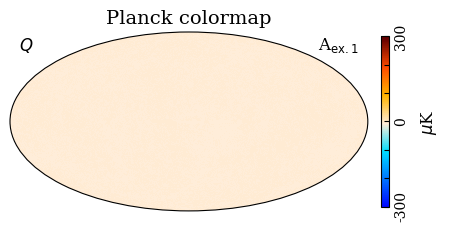

In [ ]:
import healpy as hp
from healpy.newvisufunc import projview, newprojplot
import matplotlib.pyplot as plt
import numpy as np
m = hp.read_map(
    "/home/renan/polymv/src/SMICA.fits",
)
# classic healpy mollweide projections plot
# other matplotlib projections are possible, such as: "aitoff","hammer",lambert"
# classic healpy mollweide projections plot with graticule and axis labels and vertical color bar
m_scaled = m*3000
projview(
    m_scaled,
    title="Planck colormap",
    cmap="planck",
    rlabel=r"A$_{\mathsf{ex. 1}}$",
    llabel=r"$Q$",
    unit=r"$\mu$K",
    fontname="serif",
    width=10,
    show_tickmarkers=True,
    cbar_ticks=[-300, 0, 300],
    cb_orientation="vertical",
    sub=121,
    override_plot_properties={"cbar_tick_direction": "in"},
)
newprojplot(theta=np.radians(50), phi=np.radians(60), marker="o", color="r", markersize=10);

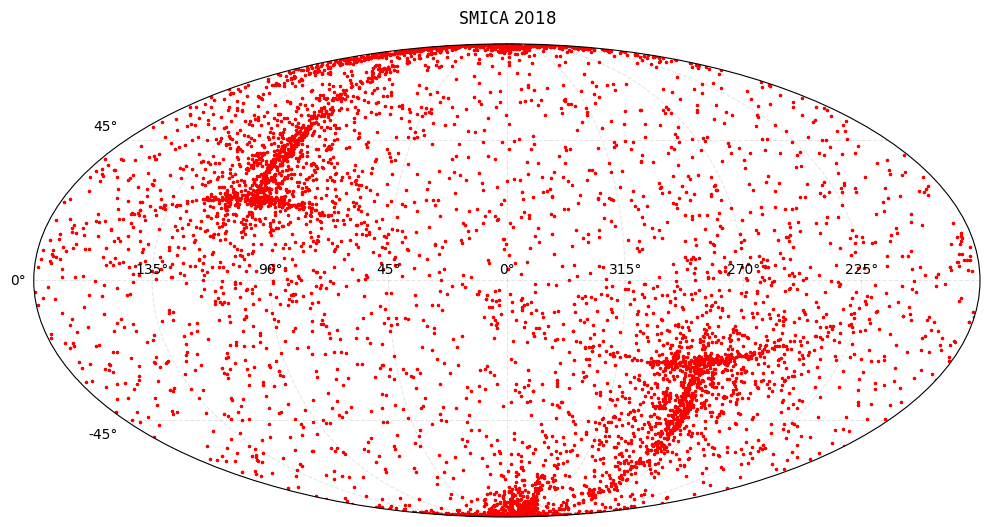

In [35]:
org=0
title="Mollweide projection"
projection="mollweide"
dpi_global = 75
format_figure = ".pdf"
size_mollweide = (10, 6.180)
size_graphics = (10, 6.180)
size_histograms = (20, 12.361)
bins_global = 50
font_legend = 14
size=size_mollweide
title=r"$\tt{SMICA}$ 2018"
theta = fvs_c[:, 0]
phi = fvs_c[:, 1]
# This is necessary to shift [-pi,pi] -> [0,2*pi]
for i in range(len(phi)):
    if phi[i] < 0:
        phi[i] = 2 * np.pi + phi[i]
theta_ = np.pi - theta
phi_ = np.pi + phi
for i in range(len(phi_)):
    if phi_[i] > 2 * np.pi:
        phi_[i] = phi_[i] - 2 * np.pi

theta = np.concatenate((theta, theta_))
phi = np.concatenate((phi, phi_))

RA = np.rad2deg(phi)
Dec = 90 - np.rad2deg(theta)

x = np.remainder(RA + 360 - org, 360)
ind = x > 180
x[ind] -= 360
x = -x

fig = plt.figure(figsize=size)
ax = fig.add_subplot(111, projection=projection)
ax.scatter(np.radians(x), np.radians(Dec), color="red", s=2, rasterized=True)
ax.scatter(np.radians(x), np.radians(Dec), color="red", s=2, rasterized=True)
ax.set_title(title, y=1.025)

ax.grid(True, color="k", linestyle="dashed", alpha=0.1)
ax.set_longitude_grid(45)  # deg
ax.set_latitude_grid(45)
ax.set_longitude_grid_ends(90)
tick_labels = np.array([r"135°", r"90°", r"45°", r"0°", r"315°", r"270°", r"225°"])
ax.set_xticklabels(tick_labels)
plt.tight_layout()
plt.show()

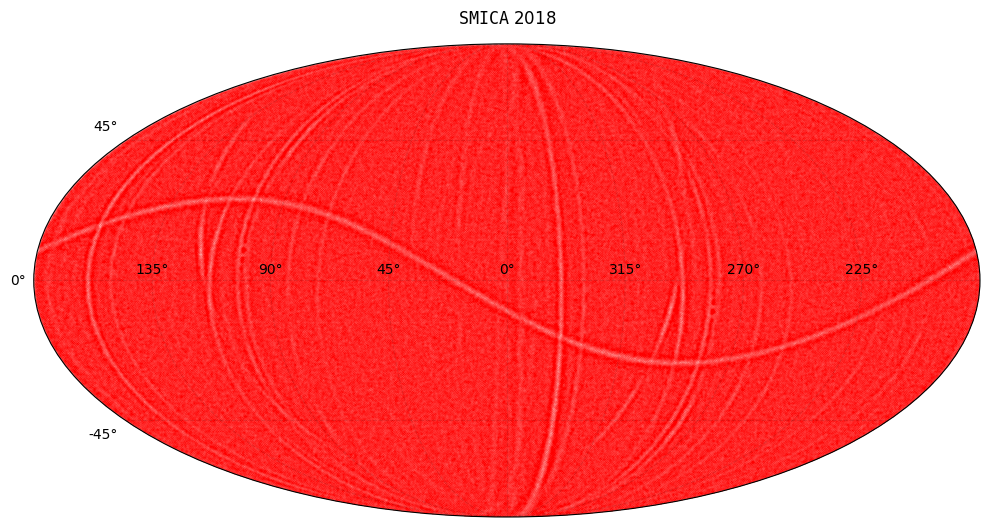

In [37]:
org=0
title="Mollweide projection"
projection="mollweide"
dpi_global = 75
format_figure = ".pdf"
size_mollweide = (10, 6.180)
size_graphics = (10, 6.180)
size_histograms = (20, 12.361)
bins_global = 50
font_legend = 14
size=size_mollweide
title=r"$\tt{SMICA}$ 2018"
theta = mvs_c[:, 0]
phi = mvs_c[:, 1]

# This is necessary to shift [-pi,pi] -> [0,2*pi]
for i in range(len(phi)):
    if phi[i] < 0:
        phi[i] = 2 * np.pi + phi[i]

RA = np.rad2deg(phi)
Dec = 90 - np.rad2deg(theta)

x = np.remainder(RA + 360 - org, 360)
ind = x > 180
x[ind] -= 360
x = -x

fig = plt.figure(figsize=size)
ax = fig.add_subplot(111, projection=projection)
ax.scatter(np.radians(x), np.radians(Dec), color="red", s=0.0001, rasterized=True)
ax.set_title(title, y=1.025)

ax.grid(True, color="k", linestyle="dashed", alpha=0.1)
ax.set_longitude_grid(45)  # deg
ax.set_latitude_grid(45)
ax.set_longitude_grid_ends(90)
tick_labels = np.array([r"135°", r"90°", r"45°", r"0°", r"315°", r"270°", r"225°"])
ax.set_xticklabels(tick_labels)
plt.tight_layout()
plt.show()